<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,3.025157,160.464246,158.403794,2.060453
1,0.0,1.0,95.145814,36.678058,32.755933,13.707825,188.287630,171.698073,16.589558
2,0.0,2.0,60.443735,47.585077,69.899609,23.882339,211.810760,186.746243,25.064517
3,0.0,3.0,31.749471,39.444064,81.196086,-18.763465,143.626155,162.539402,-18.913246
4,0.0,4.0,75.571924,28.101242,59.999407,5.176168,178.848740,172.757041,6.091698
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-19.754418,138.496019,159.112993,-20.616975
59996,999.0,56.0,64.963417,65.855822,20.013285,51.087432,211.919956,160.566056,51.353900
59997,999.0,57.0,28.983831,65.042478,32.769278,-34.770460,102.025127,133.306328,-31.281201
59998,999.0,58.0,92.143225,62.373276,34.331948,19.238984,218.087433,201.746133,16.341300


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,3.025157,160.464246,158.403794,2.060453
1,0.0,1.0,95.145814,36.678058,32.755933,13.707825,188.287630,171.698073,16.589558
2,0.0,2.0,60.443735,47.585077,69.899609,23.882339,211.810760,186.746243,25.064517
3,0.0,3.0,31.749471,39.444064,81.196086,-18.763465,143.626155,162.539402,-18.913246
4,0.0,4.0,75.571924,28.101242,59.999407,5.176168,178.848740,172.757041,6.091698
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-19.754418,138.496019,159.112993,-20.616975
59996,999.0,56.0,64.963417,65.855822,20.013285,51.087432,211.919956,160.566056,51.353900
59997,999.0,57.0,28.983831,65.042478,32.769278,-34.770460,102.025127,133.306328,-31.281201
59998,999.0,58.0,92.143225,62.373276,34.331948,19.238984,218.087433,201.746133,16.341300


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    21.640995  34.925259  90.872835  ...  160.464246  158.403794   2.060453
      1.0    95.145814  36.678058  32.755933  ...  188.287630  171.698073  16.589558
      2.0    60.443735  47.585077  69.899609  ...  211.810760  186.746243  25.064517
      3.0    31.749471  39.444064  81.196086  ...  143.626155  162.539402 -18.913246
      4.0    75.571924  28.101242  59.999407  ...  178.848740  172.757041   6.091698
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   27.655950  26.943522  93.650964  ...  138.496019  159.112993 -20.616975
      56.0   64.963417  65.855822  20.013285  ...  211.919956  160.566056  51.353900
      57.0   28.983831  65.042478  32.769278  ...  102.025127  133.306328 -31.281201
      58.0   92.143225  62.373276  34.331948  ...  218.087433  201.746133  16.341300
      59.0   23.025996  28.855452  24.490296  ...   78.627950   85.620481  -6.992531

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    21.640995  34.925259  90.872835  ...  160.464246  158.403794   2.060453
      1.0    95.145814  36.678058  32.755933  ...  188.287630  171.698073  16.589558
      2.0    60.443735  47.585077  69.899609  ...  211.810760  186.746243  25.064517
      3.0    31.749471  39.444064  81.196086  ...  143.626155  162.539402 -18.913246
      4.0    75.571924  28.101242  59.999407  ...  178.848740  172.757041   6.091698
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   27.655950  26.943522  93.650964  ...  138.496019  159.112993 -20.616975
      56.0   64.963417  65.855822  20.013285  ...  211.919956  160.566056  51.353900
      57.0   28.983831  65.042478  32.769278  ...  102.025127  133.306328 -31.281201
      58.0   92.143225  62.373276  34.331948  ...  218.087433  201.746133  16.341300
      59.0   23.025996  28.855452  24.490296  ...   78.627950   85.620481  -6.992531

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,3.025157,160.464246,158.403794,2.060453
1,0.0,1.0,95.145814,36.678058,32.755933,13.707825,188.287630,171.698073,16.589558
2,0.0,2.0,60.443735,47.585077,69.899609,23.882339,211.810760,186.746243,25.064517
3,0.0,3.0,31.749471,39.444064,81.196086,-18.763465,143.626155,162.539402,-18.913246
4,0.0,4.0,75.571924,28.101242,59.999407,5.176168,178.848740,172.757041,6.091698
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-19.754418,138.496019,159.112993,-20.616975
59996,999.0,56.0,64.963417,65.855822,20.013285,51.087432,211.919956,160.566056,51.353900
59997,999.0,57.0,28.983831,65.042478,32.769278,-34.770460,102.025127,133.306328,-31.281201
59998,999.0,58.0,92.143225,62.373276,34.331948,19.238984,218.087433,201.746133,16.341300


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    21.640995  34.925259  90.872835  ...  160.464246  158.403794   2.060453
      1.0    95.145814  36.678058  32.755933  ...  188.287630  171.698073  16.589558
      2.0    60.443735  47.585077  69.899609  ...  211.810760  186.746243  25.064517
      3.0    31.749471  39.444064  81.196086  ...  143.626155  162.539402 -18.913246
      4.0    75.571924  28.101242  59.999407  ...  178.848740  172.757041   6.091698
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   27.655950  26.943522  93.650964  ...  138.496019  159.112993 -20.616975
      56.0   64.963417  65.855822  20.013285  ...  211.919956  160.566056  51.353900
      57.0   28.983831  65.042478  32.769278  ...  102.025127  133.306328 -31.281201
      58.0   92.143225  62.373276  34.331948  ...  218.087433  201.746133  16.341300
      59.0   23.025996  28.855452  24.490296  ...   78.627950   85.620481  -6.992531

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

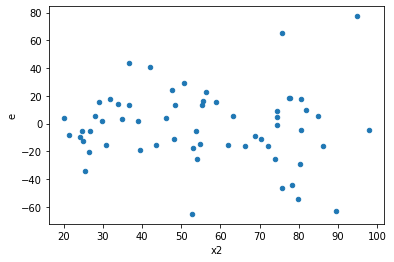

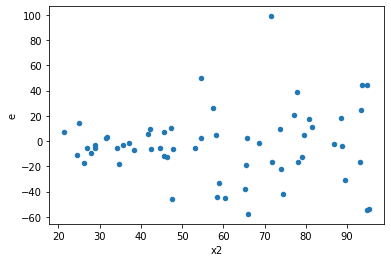

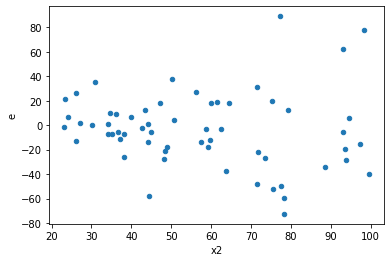

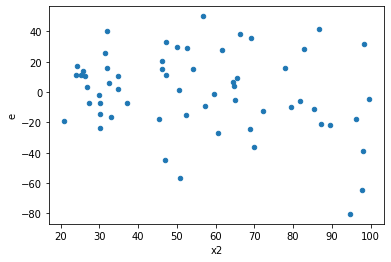

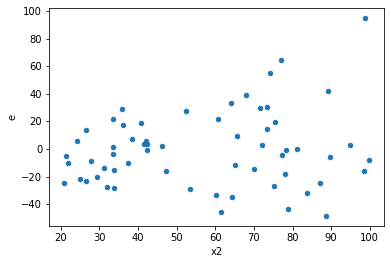

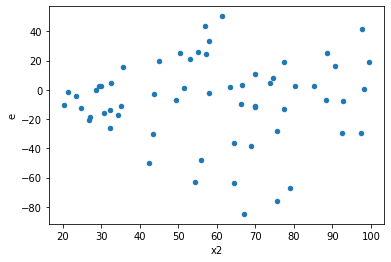

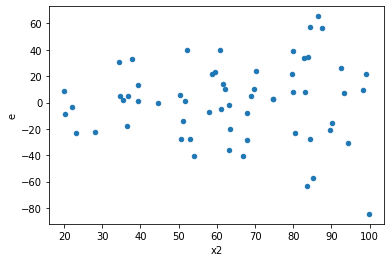

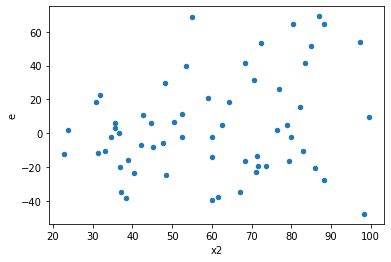

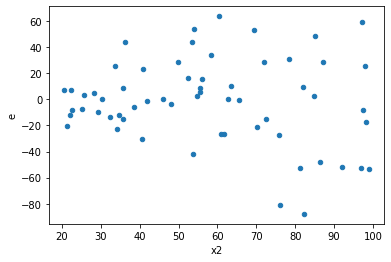

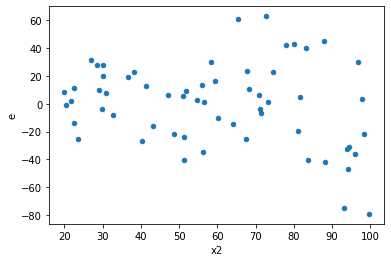

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,24143.31056191576,7091.515967685858,1207.165528095788,354.5757983842929,3.404534470757786,0.007044367482758052,0.996477816258621,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,29805.579851826435,3093.2546019295714,1490.2789925913216,154.66273009647858,9.63566976776943,2.5536116923241536e-06,0.9999987231941538,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,32002.718885619346,5849.732131964701,1600.1359442809674,292.486606598235,5.470800741583847,0.0002621100438178203,0.9998689449780911,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,17510.741871403916,6974.501407974277,875.5370935701958,348.72507039871385,2.5106800969862957,0.04040474909320224,0.9797976254533989,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,25957.546978574355,4934.417855919286,1297.8773489287178,246.7208927959643,5.260508480739202,0.0003520670777763524,0.9998239664611118,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,18682.53175143154,5612.16209279491,934.1265875715769,280.6081046397455,3.328936592087536,0.008097826049074497,0.9959510869754628,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,31108.193469162266,9675.877365816024,1555.4096734581133,483.79386829080124,3.215025603679582,0.01001890870052069,0.9949905456497397,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,22184.603932447302,6210.381923846631,1109.2301966223652,310.5190961923316,3.5721802949449595,0.005199293152677642,0.9974003534236612,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,37774.697953839364,5989.5100988423565,1888.7348976919682,299.4755049421178,6.306809293324408,8.715282939020241e-05,0.9999564235853049,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,24143.31056191576,7091.515967685858,1207.165528095788,354.5757983842929,3.404534470757786,0.007044367482758052,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,29805.579851826435,3093.2546019295714,1490.2789925913216,154.66273009647858,9.63566976776943,2.5536116923241536e-06,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,32002.718885619346,5849.732131964701,1600.1359442809674,292.486606598235,5.470800741583847,0.0002621100438178203,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,17510.741871403916,6974.501407974277,875.5370935701958,348.72507039871385,2.5106800969862957,0.04040474909320224,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,25957.546978574355,4934.417855919286,1297.8773489287178,246.7208927959643,5.260508480739202,0.0003520670777763524,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,18682.53175143154,5612.16209279491,934.1265875715769,280.6081046397455,3.328936592087536,0.008097826049074497,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,31108.193469162266,9675.877365816024,1555.4096734581133,483.79386829080124,3.215025603679582,0.01001890870052069,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,22184.603932447302,6210.381923846631,1109.2301966223652,310.5190961923316,3.5721802949449595,0.005199293152677642,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,37774.697953839364,5989.5100988423565,1888.7348976919682,299.4755049421178,6.306809293324408,8.715282939020241e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    593
Reject001=1 : Homoscedasticity      407
Name: Result_test, dtype: int64